In [1]:
import gym
from dp import DP
from sole import SOLE
from sarsa import Sarsa
import numpy as np
from itertools import repeat, product
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
taxi_env = gym.make('Taxi-v3')
taxi_sole = SOLE(taxi_env, gamma=0.9, limit=1)
taxi_eval = DP(taxi_env, gamma=0.9)

0 0 1 2 3 4 5 6 7 8 9 10 

In [14]:
gamma = 0.9
max_eps = 100
epsilon = 0.1
repeats = 1
alphas = np.linspace(0.1, 0.5, 5)
n_steps = [1, 2, 4, 8, 16]#, 32, 64, 128, 256]

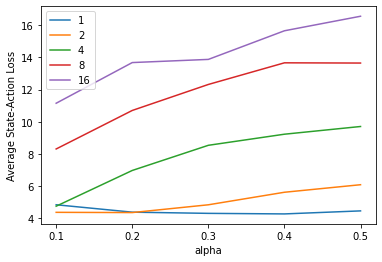

In [15]:
run_sarsa = lambda n_step, alpha: Sarsa(
    taxi_env, gamma=gamma,
    epsilon_start=epsilon, epsilon_end=epsilon,
    alpha_start=alpha, alpha_end=alpha,
    max_eps=max_eps, n_step=n_step, 
#    init_q_table=taxi_sole.get_q_table(),
    eval_q_table=taxi_eval.get_q_table(),
    tqdm_nested=False)

sarsas = [
    run_sarsa(n_step, alpha)
    for n_step, alpha, _ in
    tqdm(list(product(n_steps, alphas, range(repeats))))]

nsteps_alphas_losses = \
    np.array([sarsa.eps_q_loss[-1] for sarsa in sarsas]) \
    .reshape((len(n_steps), len(alphas), repeats))

nsteps_alphas_loss = nsteps_alphas_losses.mean(axis=2)

for n_step, alphas_loss in zip(n_steps, nsteps_alphas_loss):
    plt.plot(alphas, alphas_loss, label=n_step)
plt.ylabel('Average State-Action Loss')
plt.xlabel('alpha')
plt.xticks(alphas)
plt.legend()
plt.show()